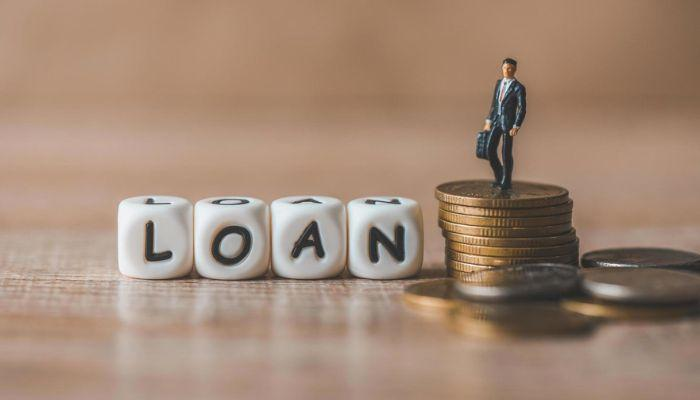

# **Background and Context**


AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# **Objectives**

* To predict whether a liability customer will buy a personal loan or not.
* To find out the variables that are most significant.
* To find out which segment of customers should be targeted more.

#**Data Dictionary**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



In [10]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
# mounting google drive
from google.colab import drive
drive .mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# loading the dataset
df= pd.read_csv("/content/drive/MyDrive/LOAN_MODELLING/Loan_Modelling.csv")

#**Exploratory Data Analysis**

In [13]:
# checking few rows
df.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4496,4497,51,25,45,95616,4,2.6,1,0,0,0,0,0,0
2717,2718,23,-2,45,95422,4,0.6,2,0,0,0,0,1,1
183,184,29,3,148,92173,3,4.1,1,0,1,0,0,1,0
1064,1065,41,17,138,95008,3,6.9,2,0,1,0,0,1,0
2407,2408,39,15,100,94720,1,0.8,2,0,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4708,4709,62,37,10,92606,3,0.5,1,0,0,0,0,1,0
4788,4789,36,10,39,92009,1,2.0,1,153,0,0,0,0,0
1965,1966,45,20,94,90095,3,0.5,3,0,0,0,0,1,0
1368,1369,46,21,40,94025,4,1.9,3,122,0,0,0,1,0


In [14]:
# checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* The loan dataset contains 5000 rows with 14 columns
* All columns are integer data type except CCAvg which is a float datatype

In [15]:
# checking for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* All columns in the dataset have no missing values

In [16]:
# checking for duplicates
df.duplicated().sum()

0

*The loan dataset have no duplicates

In [17]:
# checking for the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The average age of customers stands at 45 years
* 75% of customers have their annual income of 98000 dollars
* The average family size of customers is 2.39
* Majority(75%) of customers have attained advanced/professional education level


#**Data Visualization**

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

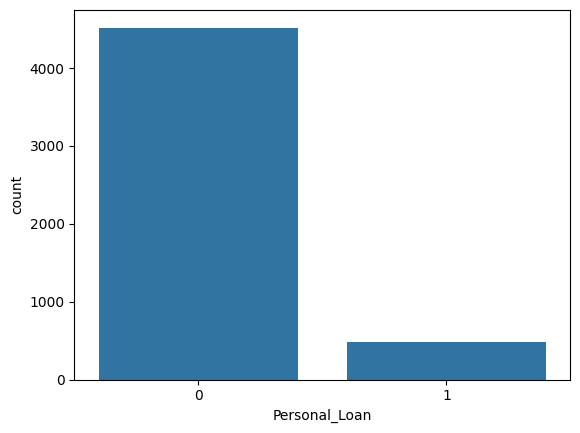

In [18]:
# ploting the target variable
sns.countplot(data= df, x= "Personal_Loan" );
df["Personal_Loan"].value_counts(normalize = True)


* The data shows an imbalance dataset
* About 90.4 percent of the customers did not patronize the banks loan advertisement whiles only 9.6 percent did patronize.

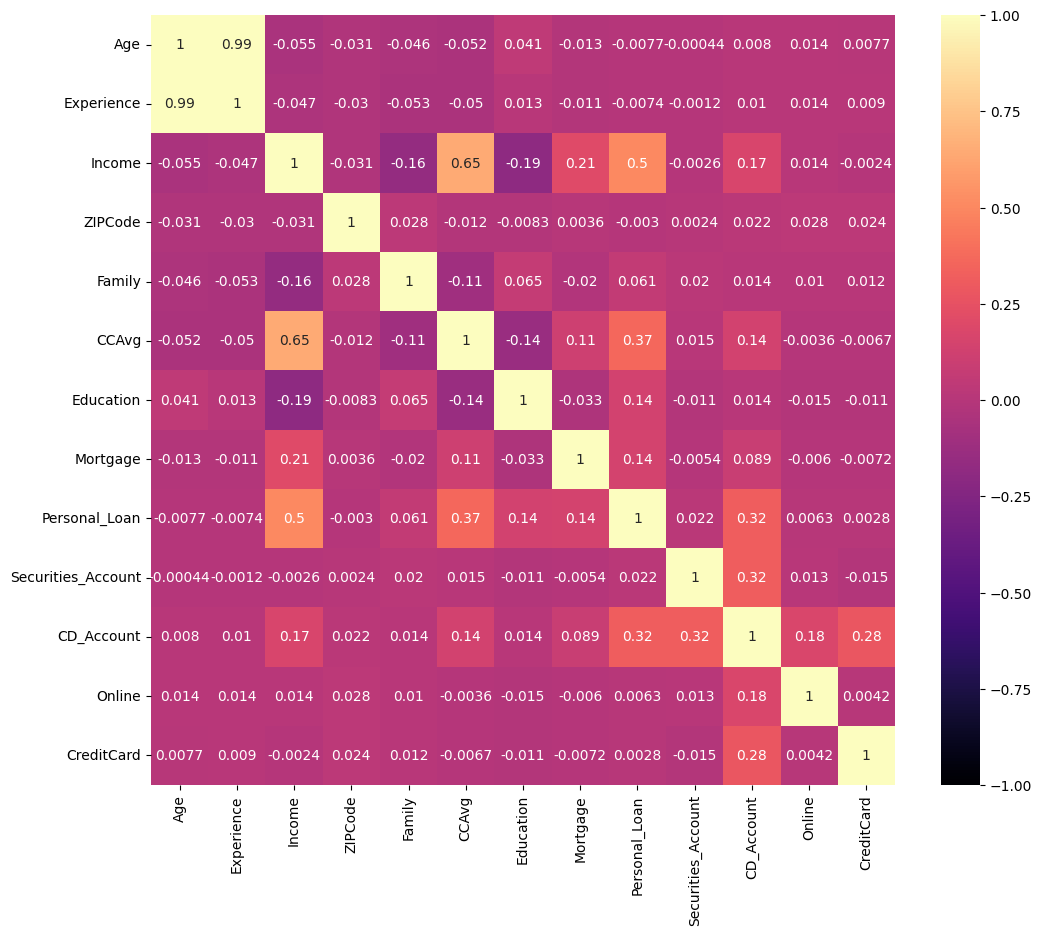

In [19]:
# Ploting correlation matrix for the features
num_df= df.drop("ID", axis = 1)
cor_mat = num_df.corr()
plt.figure(figsize= (12, 10))
sns.heatmap(data= cor_mat, vmin= -1, vmax= 1, cmap= "magma", annot= True);

* There is some evidence of multicolleaniaty as Age is highly correlated with Experince.
* However, majority of the features exhibits low correlation between the features and the targets.
* it is also worthnoting there is a medium correlation between income and the target(Personal Loan)
* Income and CCAvg shown a medium correlation(65%)

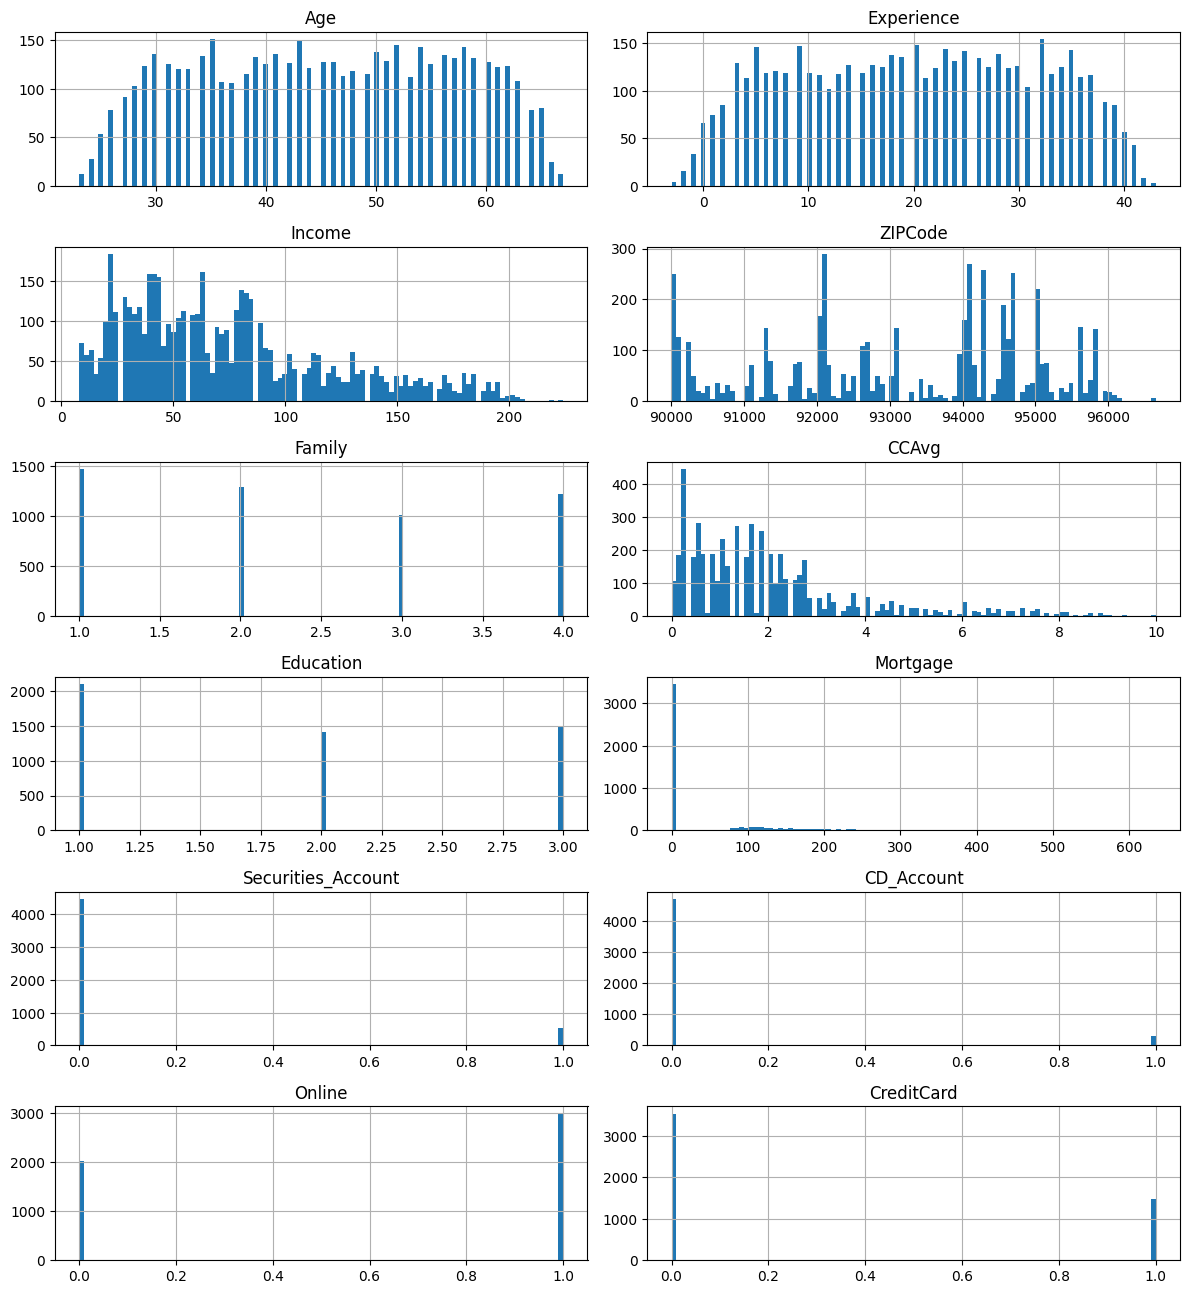

In [20]:
# finding columns to visualize by dropping the target and ID
col_vis = list(df.drop(["Personal_Loan", "ID"], axis = 1).columns)

# visualizing the distribution of the data for the input features
df[col_vis].hist(stacked= False, bins = 100, figsize= (12, 30), layout= (14, 2))
plt.tight_layout();

* Majority of the features in the dataset exhibits appromiately normal distribution

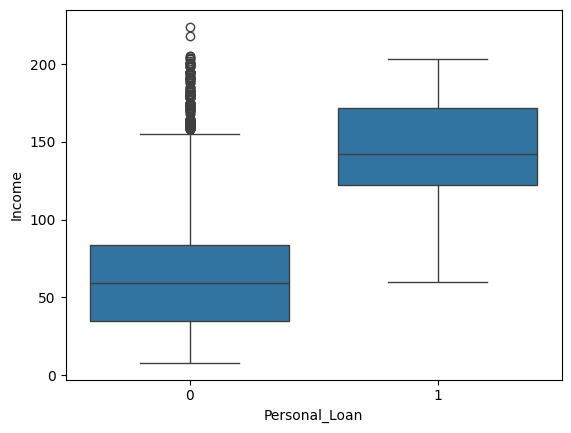

In [21]:
# bivariate plot of the target and income of customers
sns.boxplot(data= df, x= "Personal_Loan", y= "Income");

* The average annual income of Customers who purhased loan from the bank is above 100, 000 dollars

* On the other hand, customers who did not purchase loan from the bank had their average annual income little above 50, 000 dollars.

* This suggests that customers with high annual income purchase loan than customers with lower income.

# **BUILDING LOGISTIC REGRESSION MODEL**

In [22]:
# Selecting features to build the model
X= df.drop(["ID", "Personal_Loan"], axis = 1)
y = df["Personal_Loan"]

In [23]:
# spliting the data_
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [24]:
# finding the value counts of data in the y_train
y_train.value_counts()

0    3616
1     384
Name: Personal_Loan, dtype: int64

In [25]:
# finding the value counts of data in the y_test
y_test.value_counts()

0    904
1     96
Name: Personal_Loan, dtype: int64

In [26]:
# Normalizing the data using the MinMaxcaler

from sklearn.preprocessing import MinMaxScaler

#  creating an instance of the scale
scale = MinMaxScaler()
# Passing the training and testing data to the scaler
x_train_scaled= scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [27]:
# Building the model
from sklearn.linear_model import LogisticRegression

# creating an instance of the logisticregression model
logreg_model = LogisticRegression()

# training the model
logreg_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [28]:
# Making predictions
pred_class_log= logreg_model.predict(x_test_scaled)
x_pred_log = logreg_model.predict(x_train_scaled)


In [29]:
# importing the evaluation metrics for classification problem
from sklearn.metrics import(
                            accuracy_score,
                            recall_score,
                            precision_score,
                            f1_score,
                            confusion_matrix,
                            classification_report)

In [30]:
# Creating a function to evaluate the performance of the model
def model_performance(model, target, predictors):
    acc = acc= accuracy_score(target, predictors)
    recall= recall_score(target,predictors)
    precision = precision_score(target, predictors)
    f1 = f1_score(target,predictors)

    # Create a DataFrame
    metrics_df = pd.DataFrame({"Accuracy": [acc], "Recall": [recall],"Precision":[precision], "F1-Score": [1]})

    # Print the DataFrame
    print(metrics_df)

In [31]:
# Model performance on the training data
model_performance(logreg_model, y_train, x_pred_log)


   Accuracy    Recall  Precision  F1-Score
0    0.9505  0.565104      0.875         1


In [32]:
# model performance on the testing data
model_performance(logreg_model, y_test, pred_class_log)

   Accuracy    Recall  Precision  F1-Score
0     0.953  0.614583   0.855072         1


* The model was able to achieve  greater accuracy score (95%) in both the testing and training data. ie The model was able to predict correctly (True Positive and True Negative) out of the total instances
* However,  the model achieved a higher recall score (61.4%) in the testing data than the training data which had a recall score of 56.5%

* This is can be attributed to the fact that, the model generalizes well with unseen data

In [33]:
# plotting the confusion matrix
def plot_conf_matrix(target, predictions):
  conf_matrix= confusion_matrix(target, predictions)
  plt.figure(figsize= (8,5))
  sns.heatmap(conf_matrix, annot= True, fmt= "g")
  plt.xlabel("Predicted label")
  plt.ylabel("Actual label")
  plt.show()
  return conf_matrix

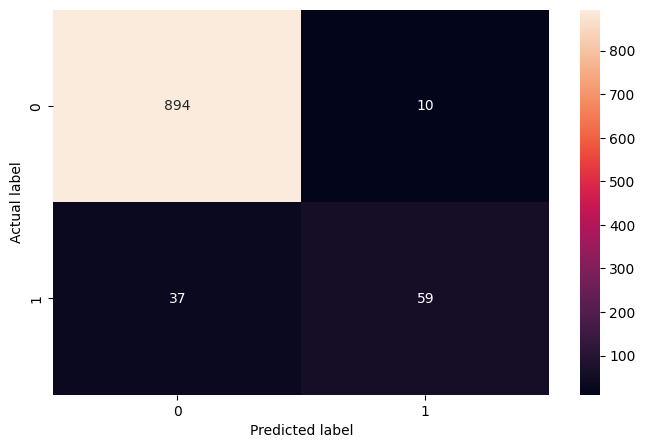

array([[894,  10],
       [ 37,  59]])

In [34]:
plot_conf_matrix(y_test, pred_class_log)


* With a total of 96 customers in the testing data who actually took a loan in the previous adversitement by the bank, the model was able to predict correctly 59 (61.4%) and wrongly predicted 37 of them as negatve. This gives a recall score of 61.4%


* Also,out of the 904 customers in the testing data who did not take loan the the previous advertisement by the bank, the model was able to predict correctly 894  of them as True negative (did not take loan).

* This gives a total accuracy score of 95.3% (59+894)/total instances (904+96)

* Out of the total True and False positive predictions (59+10), the true positive prediction is 59. This gives a precision score of 85.5%.

# **Model Improvement USING SMOTE**

In [35]:
# checking the value count of the y_train data
y_train.value_counts()

0    3616
1     384
Name: Personal_Loan, dtype: int64

In [36]:
# importing smote from imlearn
from imblearn.over_sampling import SMOTE

In [37]:
# creating an instance of SMOTE
smt = SMOTE()


In [38]:
# Applying SMOTE to the training data
x_train_smt, y_train_smt  = smt.fit_resample(x_train, y_train)

In [39]:
# sanity check on the y_train value counts after applying the smote algorithms
y_train_smt.value_counts()

0    3616
1    3616
Name: Personal_Loan, dtype: int64

In [40]:
# Normalizing the balanced data

#  create an instance of the scale
scale = MinMaxScaler()

x_train_smt_scaled= scale.fit_transform(x_train_smt)
x_test_smt_scaled = scale.transform(x_test)

In [41]:
# Rebuilding the logistic regression model on the balanced data

logreg_bal_model = LogisticRegression()
logreg_bal_model.fit(x_train_smt_scaled, y_train_smt)

LogisticRegression()

In [42]:
# Making predictions
pred_class_smt= logreg_bal_model.predict(x_test_smt_scaled)
x_pred_smt = logreg_bal_model.predict(x_train_smt_scaled)

In [43]:
# Model performance on the training data
model_performance(logreg_bal_model, y_train_smt, x_pred_smt)

   Accuracy    Recall  Precision  F1-Score
0  0.895465  0.904867   0.888165         1


In [44]:
# model performance on the testing data
model_performance(logreg_bal_model, y_test, pred_class_smt)

   Accuracy    Recall  Precision  F1-Score
0     0.879  0.916667   0.437811         1


* It is worth noting that, buiding the logistic regression model with a balanced training data increased the recall score from 61.4 percent to 91.7 percent. However, the accuracy and precision scores decrease from 95.3% and 85.5% to 88% and 44% respectively.

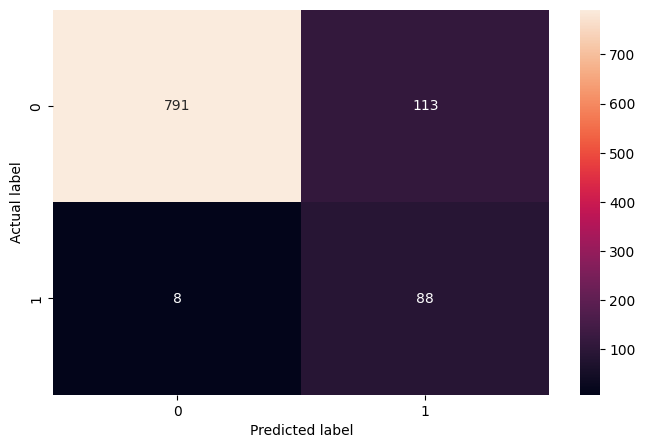

array([[791, 113],
       [  8,  88]])

In [45]:
plot_conf_matrix(y_test, pred_class_smt)

* The comfusion matrix of the balance trainng data was able to predict correctly 88 customers who purchased a loan from the bank out of the total 96 customers in the testing data.  This is quite impressive compare with the imbalance data which correctly predicted 59 out of the total number.  



#**K Nearest Neighbors (K-NN)**

In [46]:
# importing K nearest neigbors from sklearn
from sklearn.neighbors import KNeighborsClassifier


In [47]:
# creating an instance of the K-NN
knn_model = KNeighborsClassifier()

In [48]:
# training the model
knn_model.fit(x_train_smt_scaled, y_train_smt )

KNeighborsClassifier()

In [49]:
# Making predictions
pred_class_knn= knn_model.predict(x_test_smt_scaled)
x_pred_knn = knn_model.predict(x_train_smt_scaled)

In [50]:
# Model performance on the training data
model_performance(knn_model, y_train_smt, x_pred_knn)

   Accuracy    Recall  Precision  F1-Score
0  0.966538  0.982024   0.952521         1


In [51]:
# model performance on the testing data
model_performance(knn_model, y_test, pred_class_knn)

   Accuracy    Recall  Precision  F1-Score
0       0.9  0.822917   0.487654         1


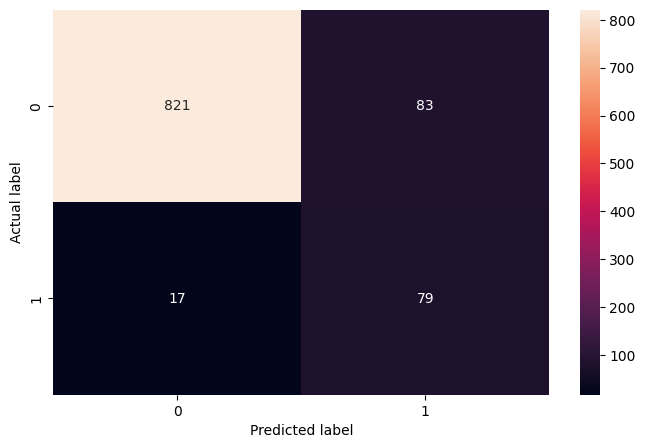

array([[821,  83],
       [ 17,  79]])

In [52]:
plot_conf_matrix(y_test, pred_class_knn)

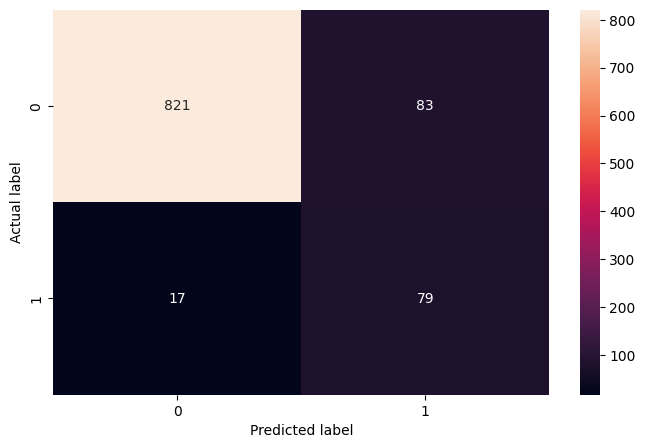

In [53]:
# plotting the confusion matrix of the balanced data
conf= confusion_matrix(y_test, pred_class_knn)
plt.figure(figsize= (8,5))
sns.heatmap(conf, annot= True, fmt= "g")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

#**Decision Tree**

In [54]:
# importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [55]:
# creating an instance of the decision tree algorithms
dtree_model = DecisionTreeClassifier(random_state= 42)

dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
# Making predictions
pred_class_dtree= dtree_model.predict(x_test)
x_pred_dtree = dtree_model.predict(x_train)

In [57]:
# Model performance on the training data
model_performance(dtree_model, y_train, x_pred_dtree)

   Accuracy  Recall  Precision  F1-Score
0       1.0     1.0        1.0         1


In [58]:
# model performance on the testing data
model_performance(dtree_model, y_test, pred_class_dtree)

   Accuracy    Recall  Precision  F1-Score
0     0.979  0.927083   0.864078         1


* The training set achieved 100% performance for all the metrics suggesting a perfect model.
* However, the testing set proved overwise since accuracy, Recall and precision achieved 97.9%, 92.7% and 86.4% respectively.
* This indicates and overfitting model  

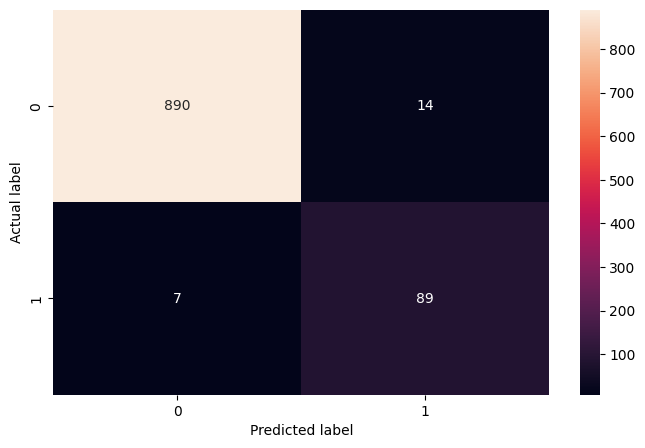

array([[890,  14],
       [  7,  89]])

In [59]:
plot_conf_matrix(y_test, pred_class_dtree)

* The confusion matrix of the decision treee shows a significant improvement in the model's predictions.
* The decision tree correctly predicted 89 customers as true positives and 890 as true negative.
* The model however wrongly predited 14 customers who are in the 0 class as having purchased loan from the bank(False Positive)
* Seven customers who purchased loan from the bank were also predicted wrongly(False negative).

### **Visualizing Decision Tree**

In [60]:
# creating a list of column names
feat_names = x_train.columns.to_list()
feat_names

['Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [61]:
def plot_decision(dtree):
  plt.figure(figsize=(35, 30))
  dtree= tree.plot_tree(dtree, feature_names= feat_names, filled= True, fontsize=9, node_ids= False, class_names= True)

  for k in dtree:
    arrow = k.arrow_patch
    if arrow is None:
      arrow.set_edgecolor("black")
      arrow.set_linewidth(1)
  plt.show()

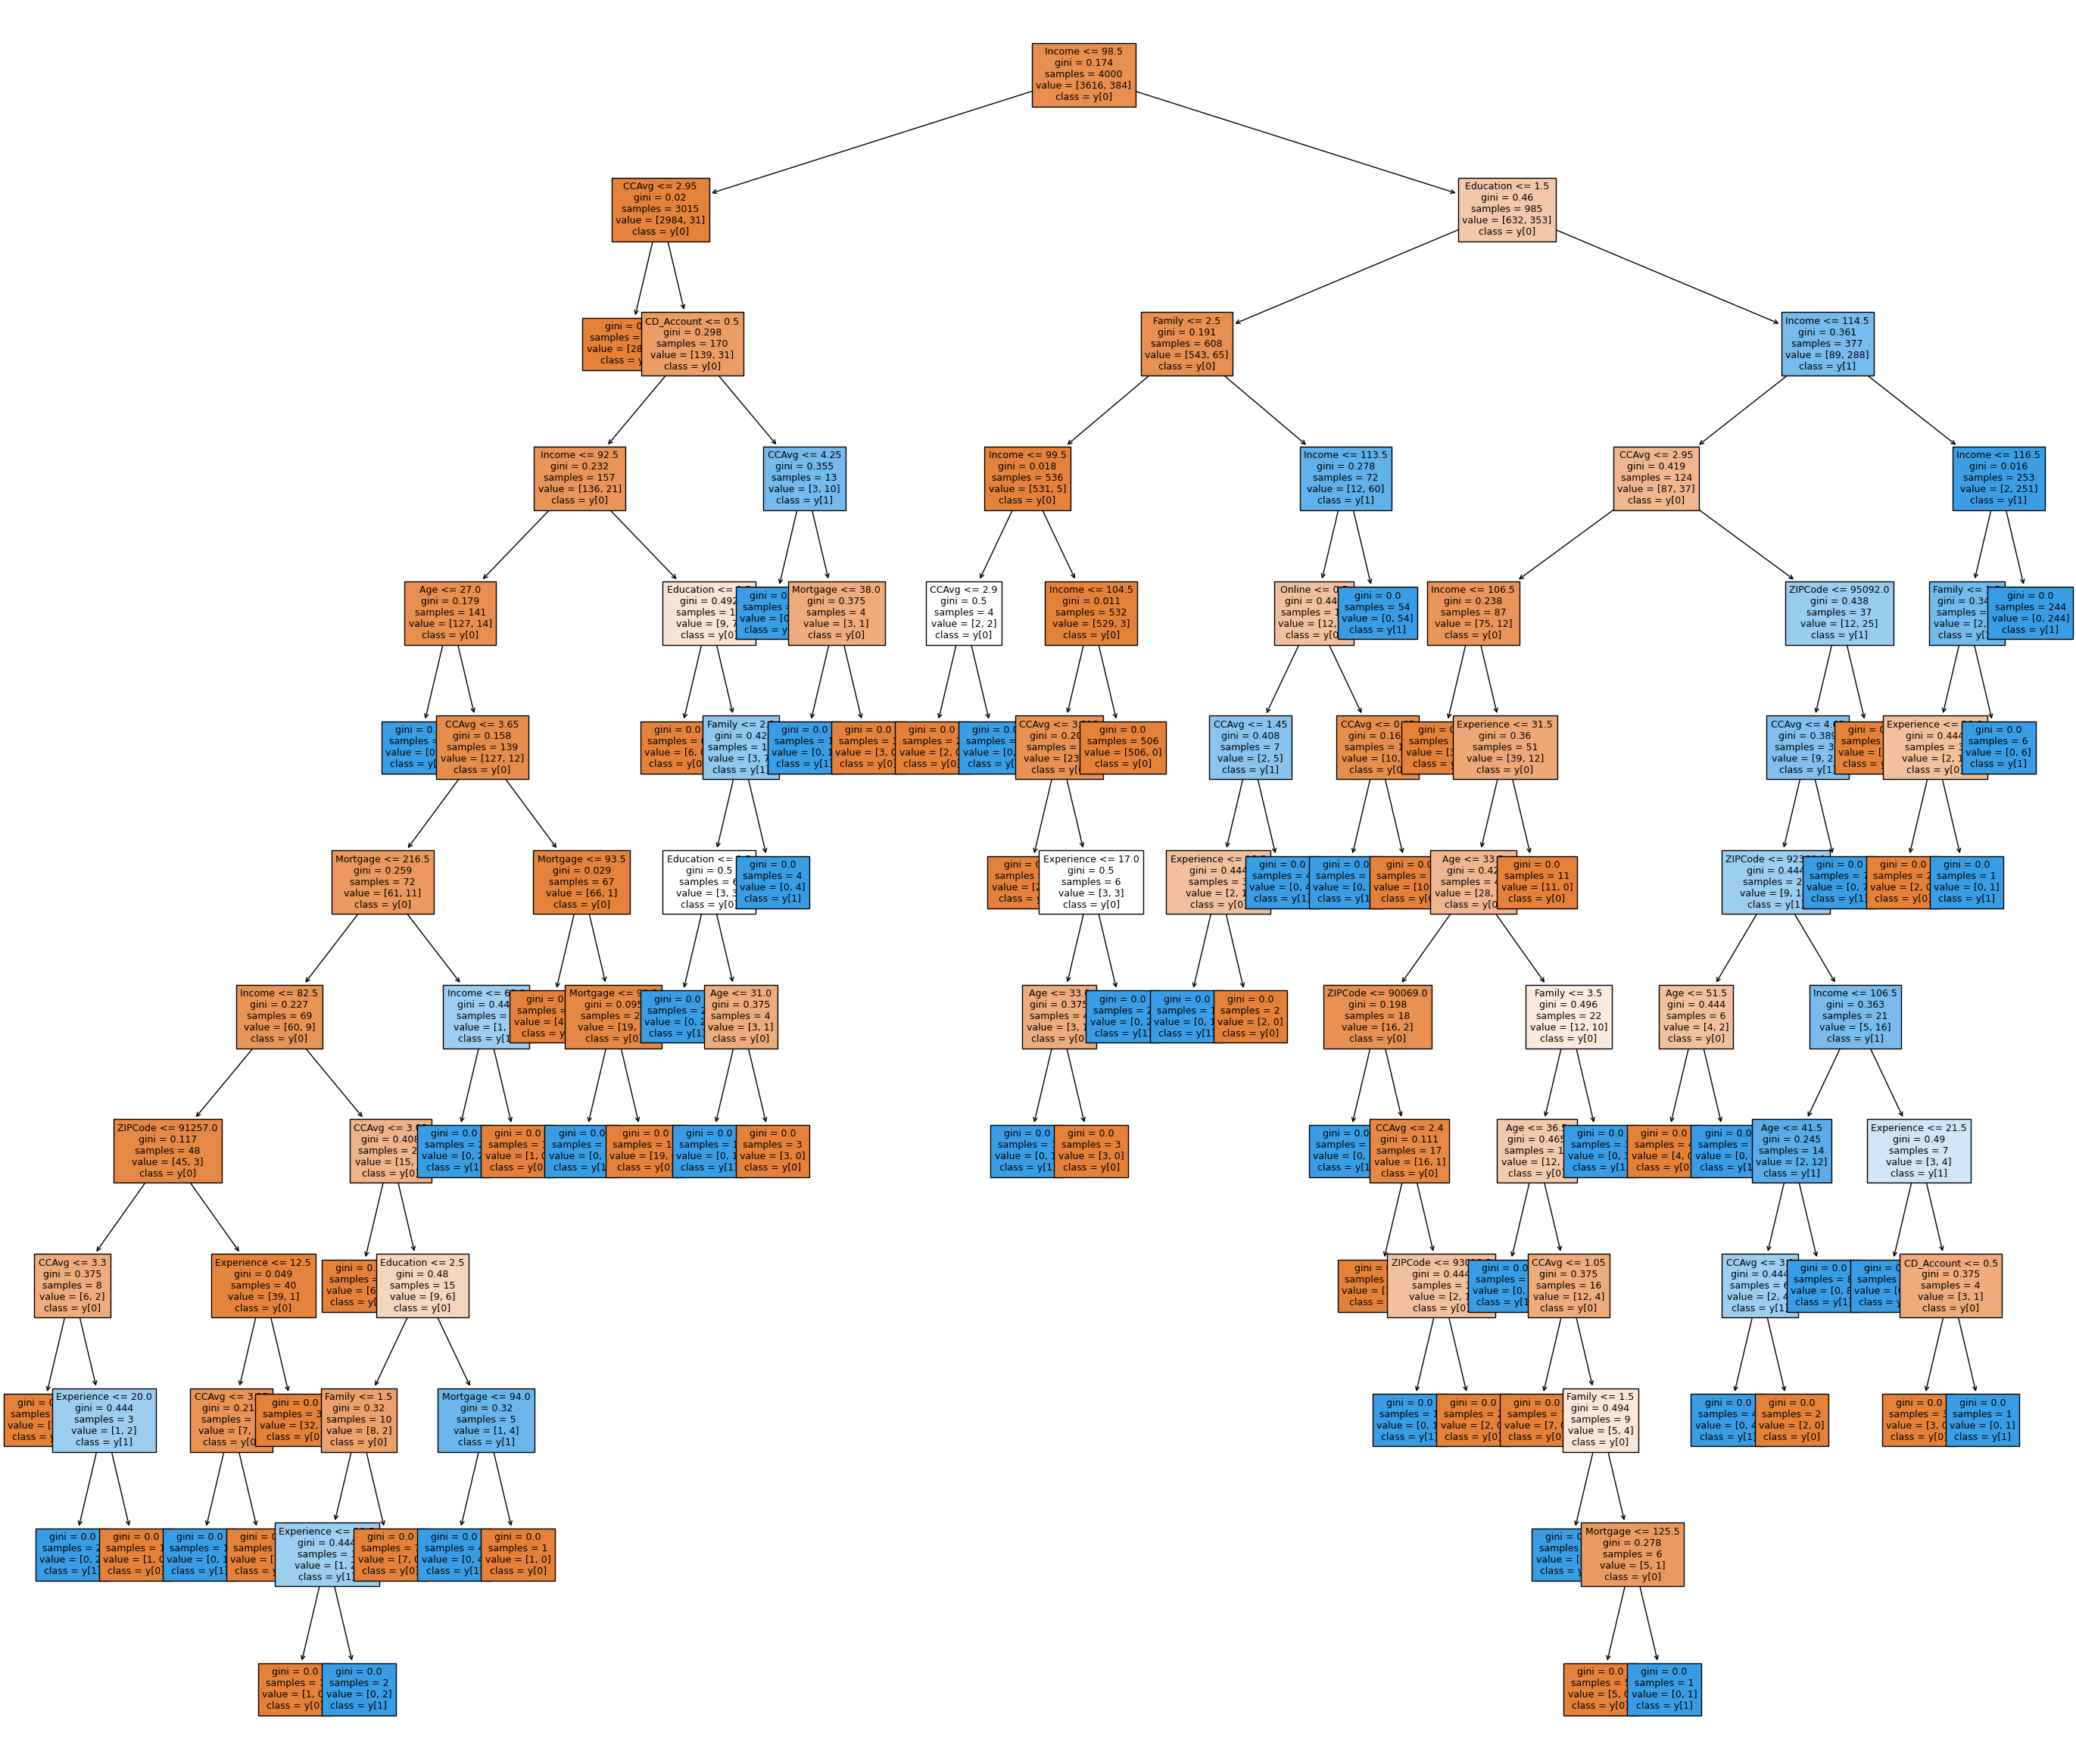

In [62]:
plot_decision(dtree_model)

* The income of customers was used as the node to build the tree.
*The critarion used to choose the feature(income) was gini
* Using the default max_depth, the tree was built until pure leaf was obtained

### **Feature Importance**

In [63]:
# Selecting the important features used in builing the decision tree
feature_import = dtree_model.feature_importances_
feature_import_ascd= np.argsort(feature_import)
feature_import_ascd

array([ 8, 11, 10,  3,  7,  1,  9,  0,  5,  4,  6,  2])

In [64]:
def plot_feature_importance(dtree):
  plt.figure(figsize= (10, 10))
  plt.title("Feature Importance")
  plt.barh(range(len(feature_import_ascd)),feature_import[feature_import_ascd], color = "blue", align = "center")
  plt.yticks(range(len(feature_import_ascd)),[feat_names[i] for i in feature_import_ascd])
  plt.xlabel("Relative Importance")
  plt.show()

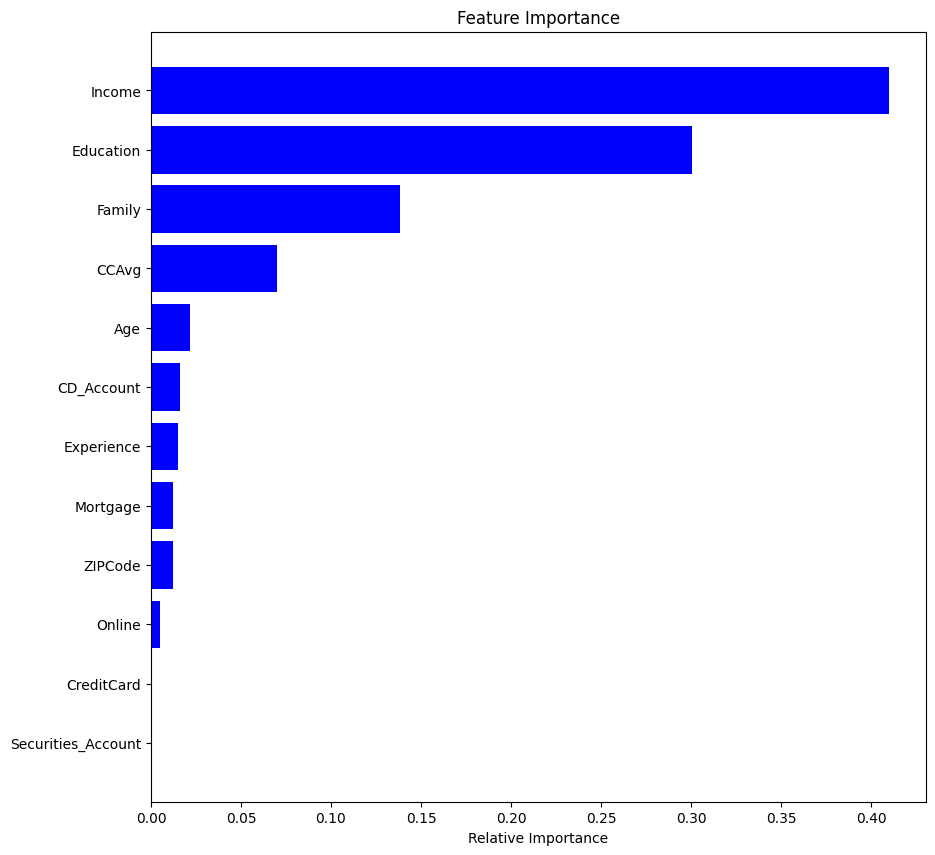

In [65]:
plot_feature_importance(dtree_model)

* The first most important feature which was used in building the tree was Income of the customers.
* This was followed by the level of education attained by customers.
* Other three important features adding up to the first two to make top five important features include; Family, CCAvg and Age

### **Pre-Prunning**

In [66]:
dtree2_model = DecisionTreeClassifier(random_state= 42, max_depth=5)
dtree2_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [67]:
# Making predictions
pred_class_dtree2= dtree2_model.predict(x_test)
x_pred_dtree2 = dtree2_model.predict(x_train)

In [68]:
# Model performance on the training data
model_performance(dtree2_model, y_train, x_pred_dtree2)

   Accuracy    Recall  Precision  F1-Score
0   0.98925  0.924479    0.96206         1


In [69]:
# model performance on the testing data
model_performance(dtree2_model, y_test, pred_class_dtree2)

   Accuracy    Recall  Precision  F1-Score
0     0.984  0.947917   0.892157         1


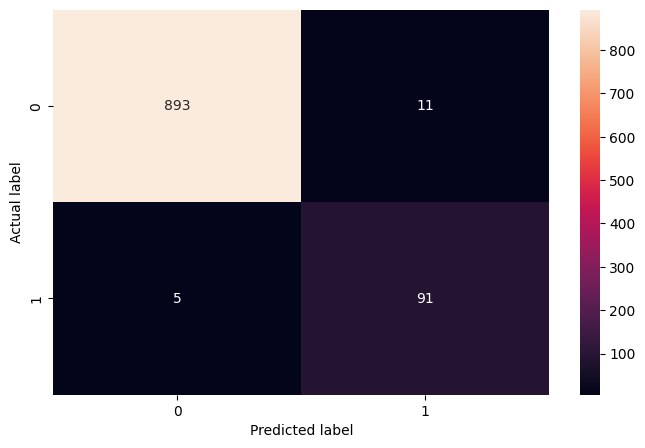

array([[893,  11],
       [  5,  91]])

In [70]:
plot_conf_matrix(y_test, pred_class_dtree2)

* The performance of the model continues to improve as 91 true positives were predicted corrctly out of the 96 by the decision tree algorithm by adjusting the maximum depth of the tree.

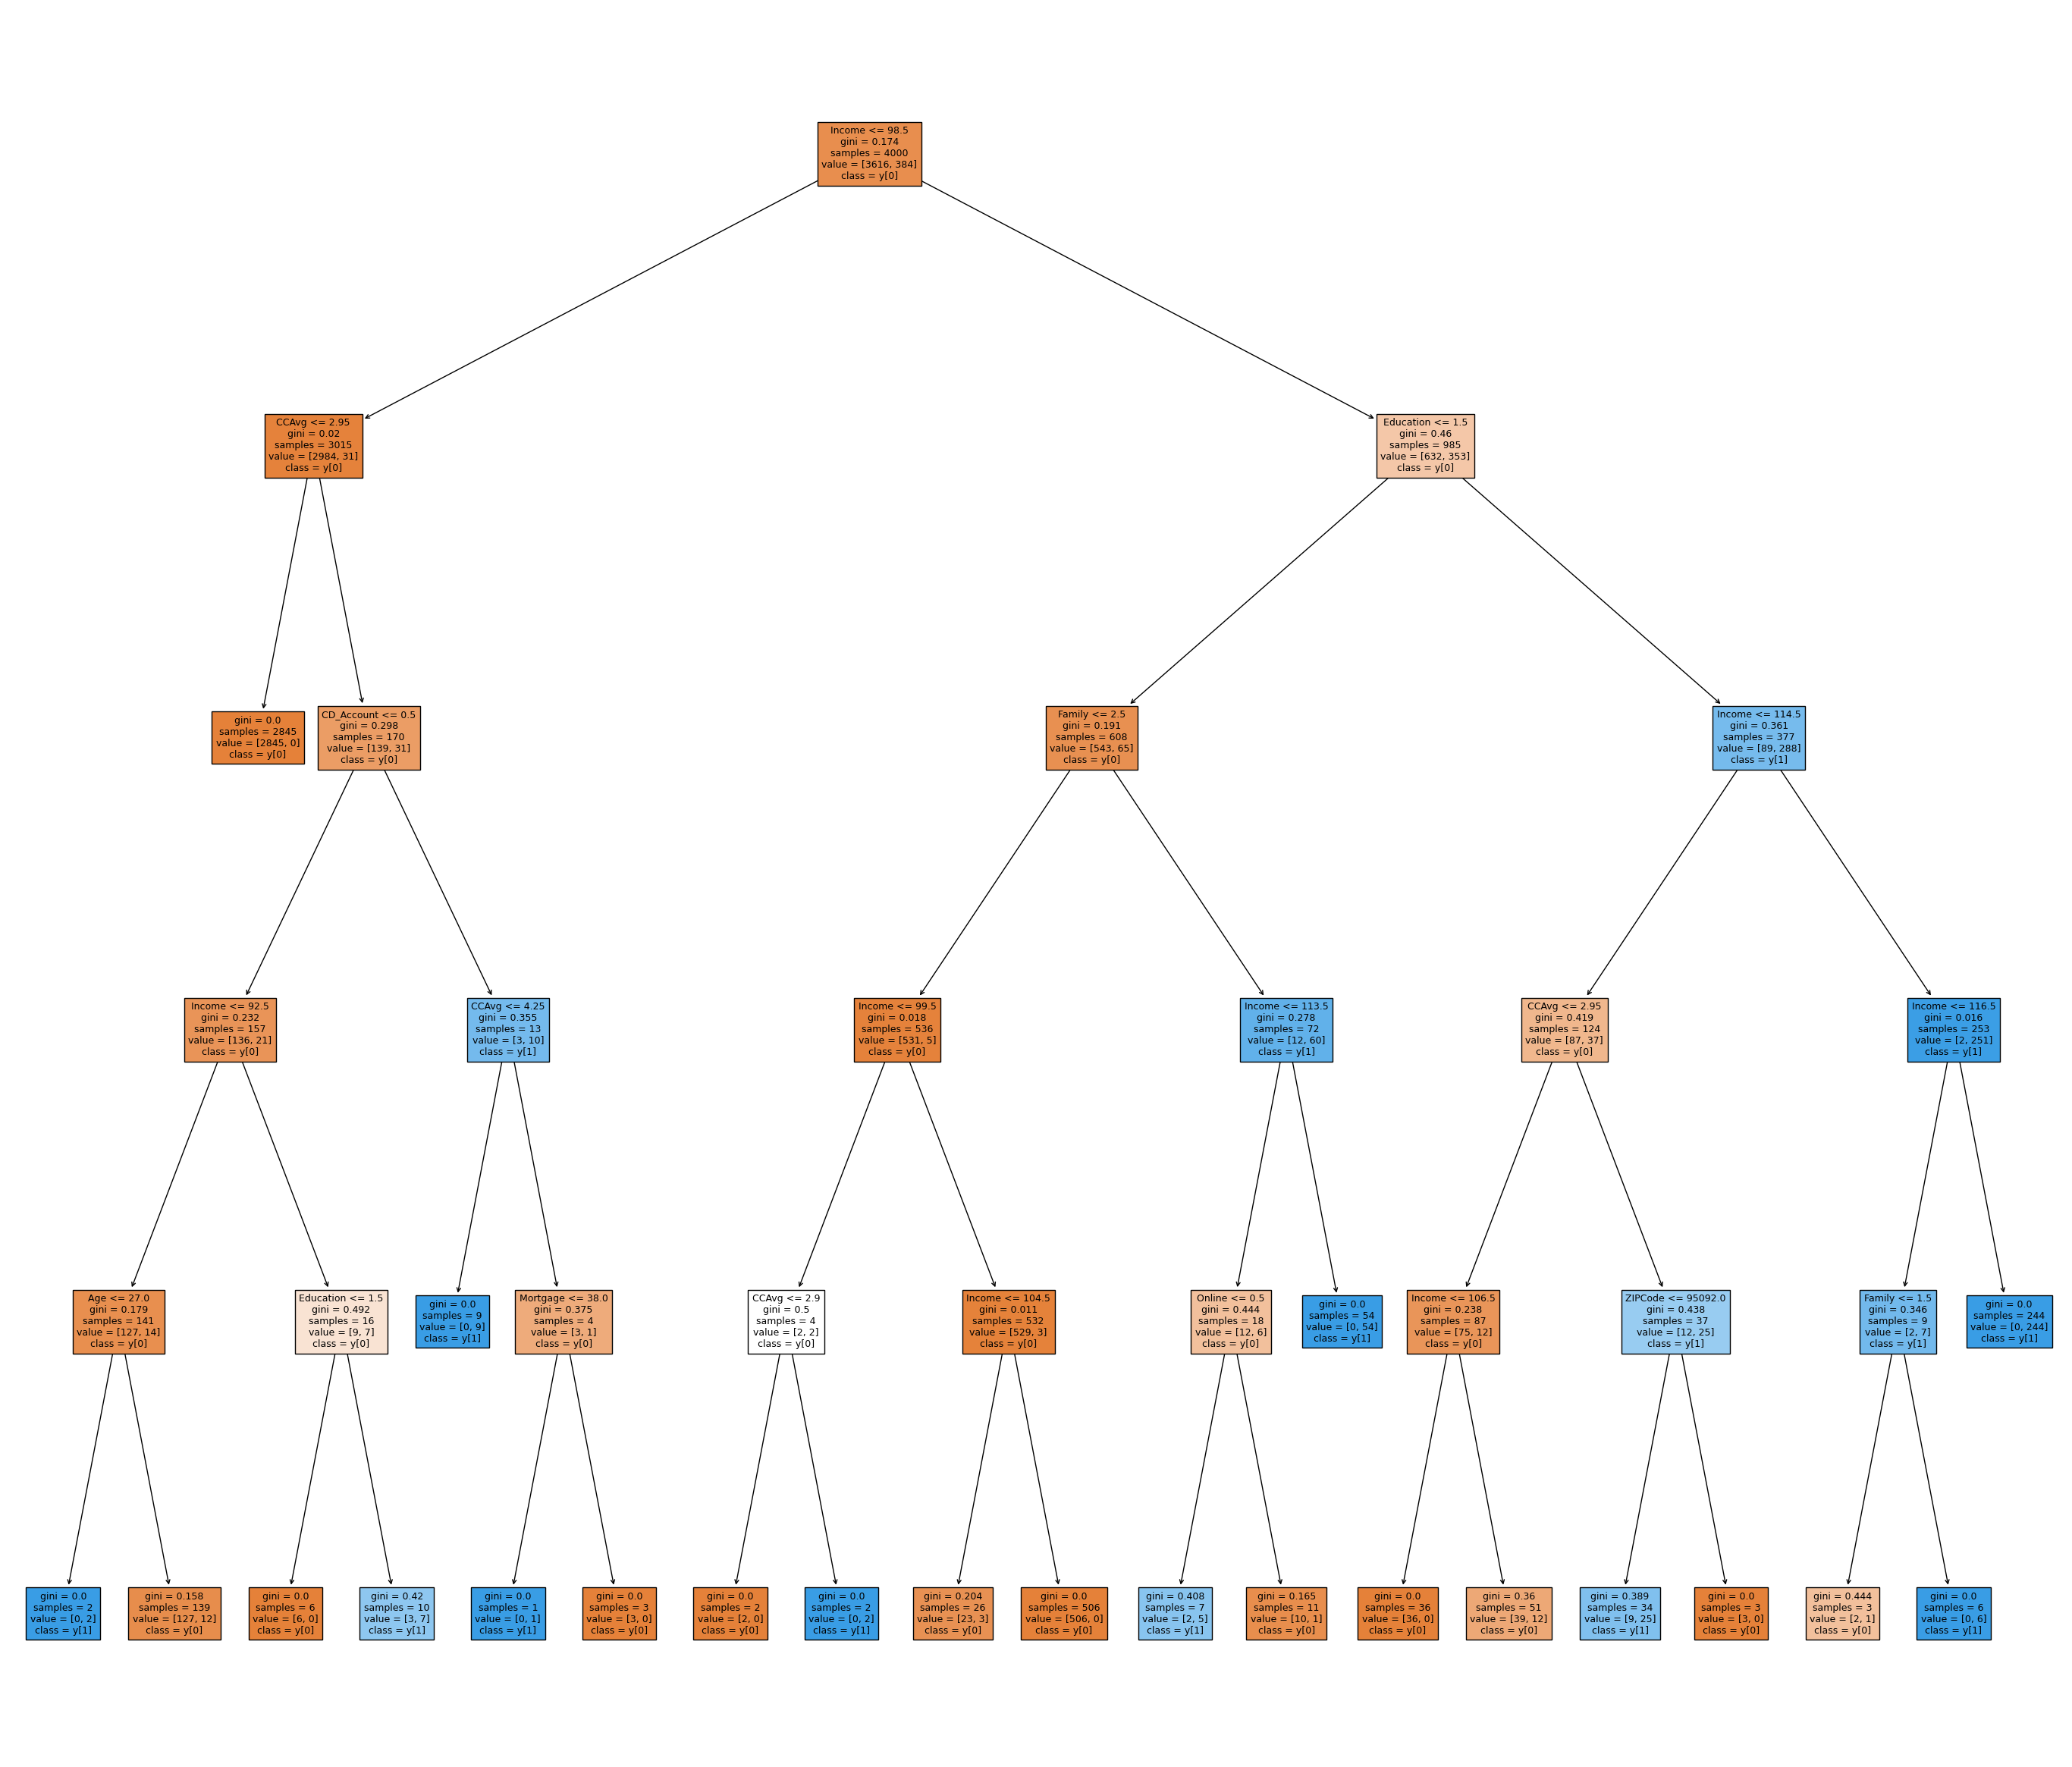

In [71]:
plot_decision(dtree2_model)

* The critarion used to choose the features was gini
* Using a max_depth 0f 5, the income of customers was also used to build the tree until pure leaves were obtained.

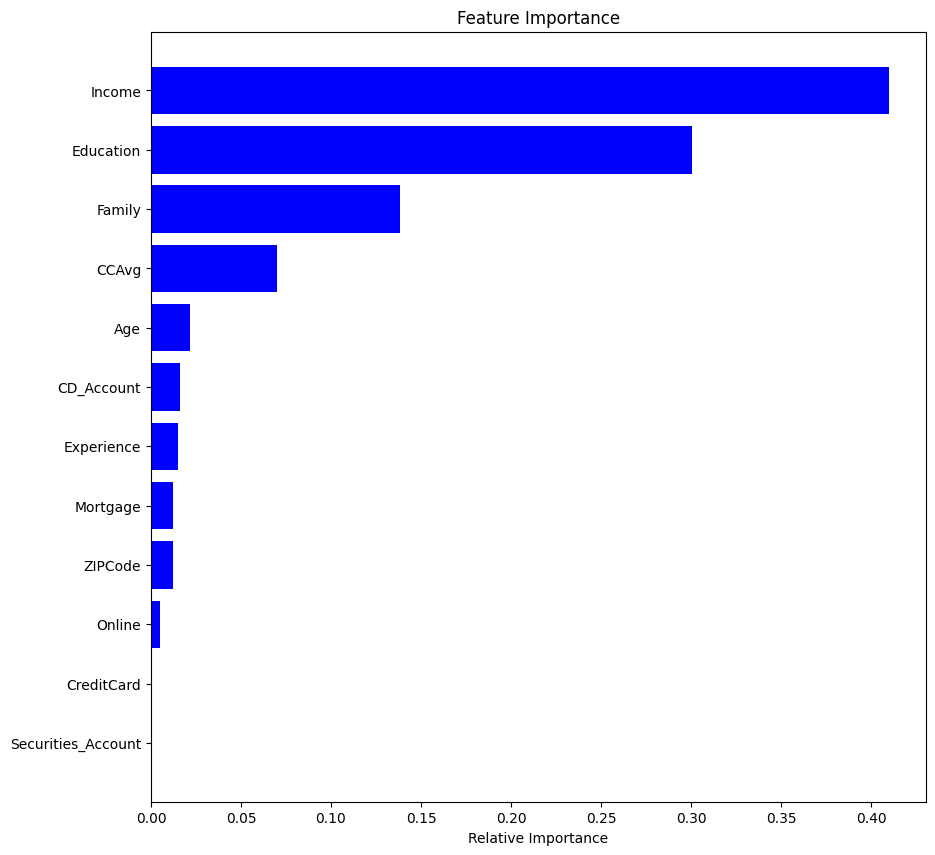

In [72]:
plot_feature_importance(dtree2_model)

* Income, Education, Faimly, CCAvg and Age continues to be the top five important features in the dataset

# **Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf_model= RandomForestClassifier(random_state= 42,max_depth=5, class_weight= {0:0.15, 1:0.85})
rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       random_state=42)

In [75]:
# Making predictions
pred_class_rf= rf_model.predict(x_test)
x_pred_rf= rf_model.predict(x_train)

In [76]:
model_performance(rf_model, y_train, x_pred_rf)

   Accuracy    Recall  Precision  F1-Score
0      0.98  0.958333   0.851852         1


In [77]:
model_performance(rf_model, y_test, pred_class_rf)

   Accuracy   Recall  Precision  F1-Score
0     0.977  0.96875   0.823009         1


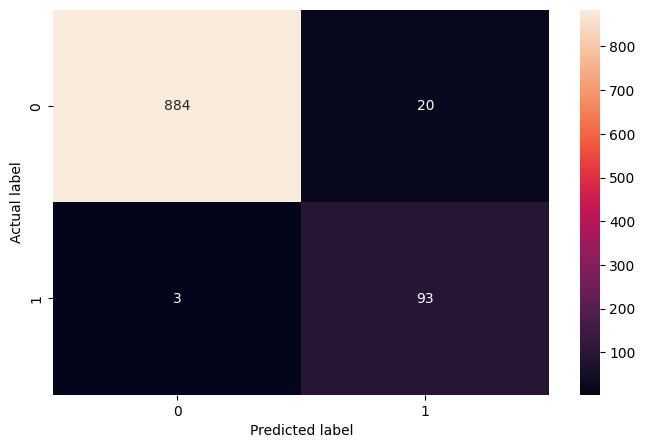

array([[884,  20],
       [  3,  93]])

In [78]:
plot_conf_matrix(y_test, pred_class_rf)

* Random forest model also made significant performance by correctly predicting 93 customers as true positive and wronly predicting 3 as fasle negative.
* The model however wrongly predicted 20 customers as False positive

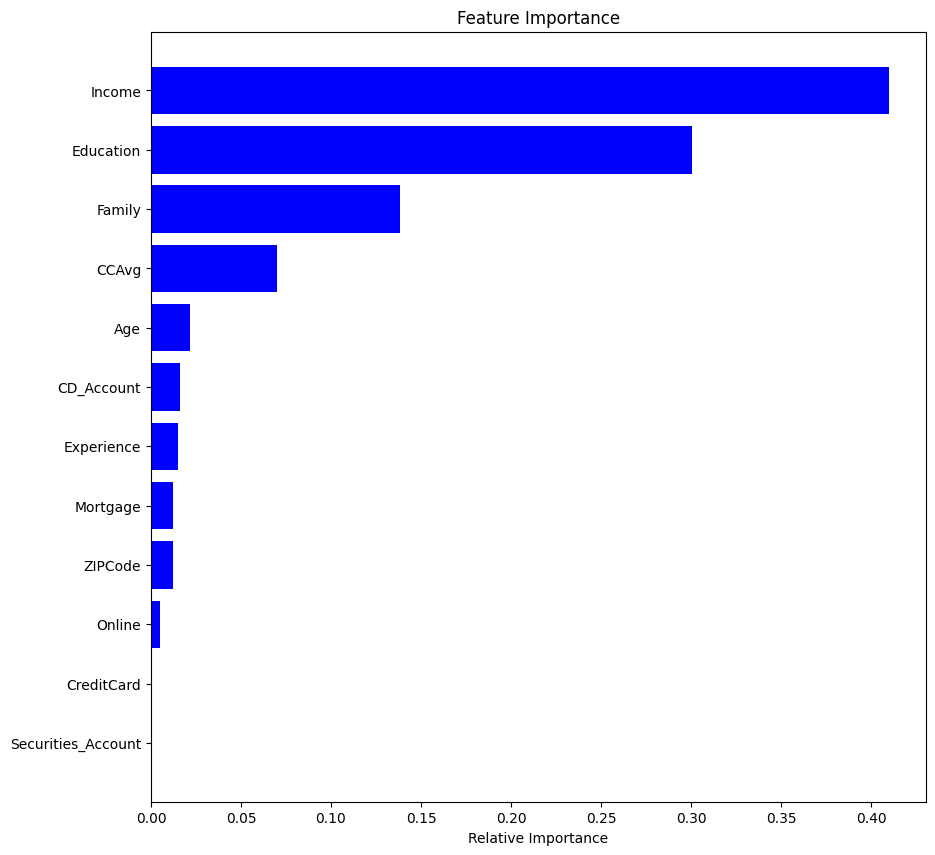

In [79]:
plot_feature_importance(rf_model)

# **Gradient Boosting**

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
gb_model= GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [82]:
# Making predictions
pred_class_gb= gb_model.predict(x_test)
x_pred_gb= gb_model.predict(x_train)

In [83]:
model_performance(gb_model, y_train, x_pred_gb)


   Accuracy    Recall  Precision  F1-Score
0    0.9935  0.940104   0.991758         1


In [84]:
model_performance(gb_model, y_test, pred_class_gb)

   Accuracy    Recall  Precision  F1-Score
0      0.99  0.958333   0.938776         1


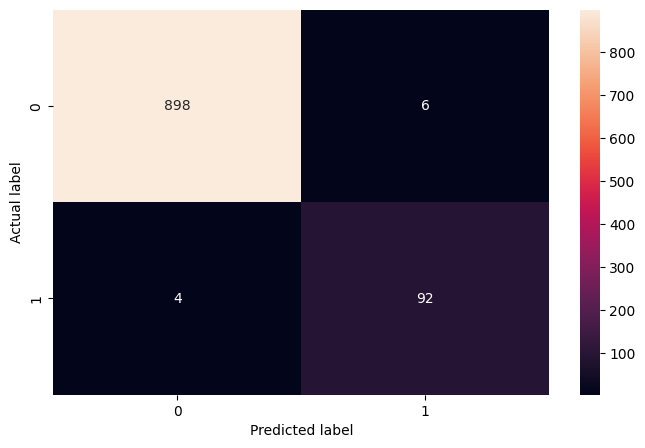

array([[898,   6],
       [  4,  92]])

In [85]:
plot_conf_matrix(y_test, pred_class_gb)

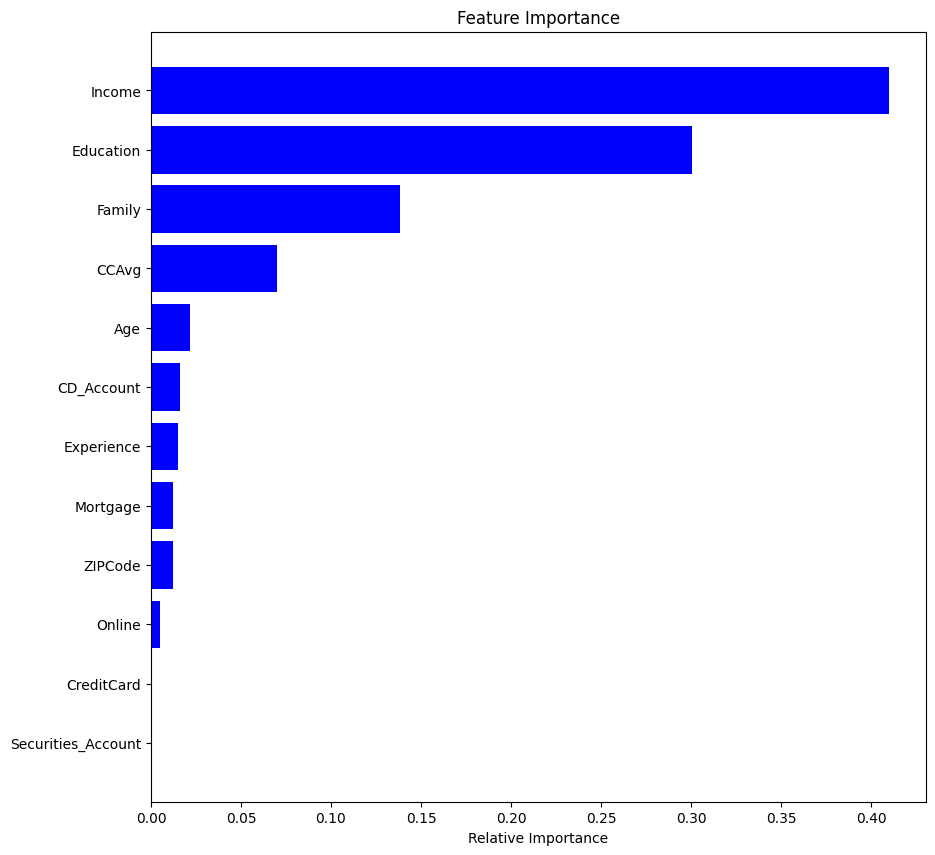

In [86]:
plot_feature_importance(gb_model)

#**Significant Variables**

* The tree based models considered in the loan modelling included; Decision Tree, Random Forest, and  Gradient Boosting.
* All the models predicted the annual income of customers as the most significant variable in the dataset.
* The Educational level of customers was predicted as the second most significant variable
* The Family size of customers, Average spending on credit card per month, and Age of customers were also considered as the third, fourth and fifth most important features respectively.

#**Segment of Customers to be targeted**

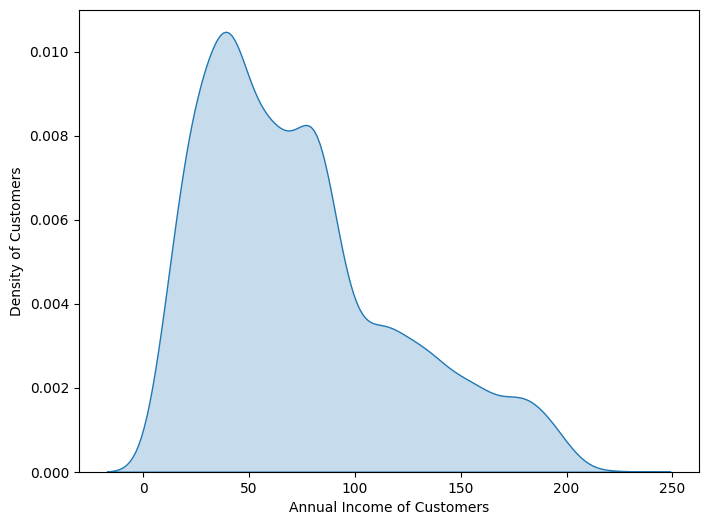

In [87]:
# ploting income density
plt.figure(figsize= (8, 6))
sns.kdeplot(data= df, x= "Income", shade = True);
plt.xlabel("Annual Income of Customers")
plt.ylabel("Density of Customers");

* As it has been established, Annual income of customers is the most significant variable in the dataset.
* The income density plot displayed above indicates that majority of the customers' income range from 0 to 100, 000 dollars.
* However, the last advertisement by the bank reavealed that customers who purchased loan from the bank had their annual income ranging from 100,000 dollars and above.
* Therefore Customers within that income bracket should be targeted in purchasing loan from the bank.